# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Version:** 0.250406.1855

> **Disclaimer:** This notebook was primarily AI-generated to demonstrate exploration of the Dandiset. It has not been fully verified by human experts. Please exercise caution when interpreting the code, results, and any conclusions. Always cross-reference with official documentation and perform your own thorough checks.

## Dandiset Overview

This notebook explores Dandiset [001375 (version 0.250406.1855)](https://dandiarchive.org/dandiset/001375/0.250406.1855).

**Title:** Septum GABA disruption with DREADDs

**Description (from Dandiset metadata):** Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

This Dandiset contains electrophysiology data, likely related to experiments investigating the role of GABAergic neurons in the septum on brain activity.

## Notebook Goals

This notebook aims to:

* Show how to access and load metadata for the Dandiset using the DANDI API.
* Demonstrate loading an NWB (Neurodata Without Borders) file from this Dandiset.
* Provide an overview of the contents of a sample NWB file.
* Illustrate how to access and visualize different types of data within the NWB file, including:
    * Raw electrophysiological traces.
    * Trial information.
    * Neuronal spike times (units).
* Encourage further exploration by providing a starting point for data analysis.

## Required Packages

To run this notebook, you will need the following Python packages installed:

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for working with NWB files)
* `h5py` (a dependency for `pynwb` to handle HDF5 files)
* `remfile` (for streaming remote files)
* `numpy` (for numerical operations)
* `pandas` (for data manipulation, especially with tabular data)
* `matplotlib` (for plotting)
* `seaborn` (for enhanced visualizations)

It is assumed that these packages are already installed in your Python environment. No installation commands are included in this notebook.

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a consistent plotting theme
sns.set_theme()

## 1. Loading Dandiset Information via DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001375"
dandiset_version = "0.250406.1855" # Version used in this notebook

try:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    
    # Print basic information about the Dandiset
    metadata = dandiset.get_raw_metadata() # get_metadata() might be more structured
    print(f"Dandiset name: {metadata.get('name', 'N/A')}")
    print(f"Dandiset URL: {metadata.get('url', 'N/A')}") # From dandiset object: dandiset.api_url
    print(f"Dandiset description: {metadata.get('description', 'N/A')}")
    
    # List some assets in the Dandiset
    print("\nFirst 5 assets (path and ID):")
    assets_iterable = dandiset.get_assets()
    for i, asset_obj in enumerate(islice(assets_iterable, 5)):
        if hasattr(asset_obj, 'asset_id') and hasattr(asset_obj, 'path'):
            print(f"- {asset_obj.path} (ID: {asset_obj.asset_id})")
        else:
            print(f"- Asset {i+1} details not fully available (e.g., missing path or asset_id). Type: {type(asset_obj)}")
            # For debugging, one might print dir(asset_obj)

except Exception as e:
    print(f"Error accessing Dandiset {dandiset_id}/{dandiset_version}: {e}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity

First 5 assets (path and ID):
- Asset 1 details not fully available (e.g., missing path or asset_id). Type: <class 'dandi.dandiapi.RemoteBlobAsset'>
- Asset 2 details not fully available (e.g., missing path or asset_id). Type: <class 'dandi.dandiapi.RemoteBlobAsset'>
- Asset 3 details not fully available (e.g., missing path or asset_id). Type: <class 'dandi.dandiapi.RemoteBlobAsset'>


## 2. Loading a Specific NWB File

For this demonstration, we will load one of the NWB files from the Dandiset. We'll use the file `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

The URL for this specific asset (ID: `ce525828-8534-4b56-9e47-d2a34d1aa897`) is:
`https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

We will use `remfile` in conjunction with `pynwb` and `h5py` to stream the data directly from the DANDI archive without needing to download the entire file locally.

In [3]:
# Define the URL for the NWB file
nwb_asset_id = "ce525828-8534-4b56-9e47-d2a34d1aa897"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
nwb_file_path_in_dandiset = "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb"

print(f"Attempting to load NWB file: {nwb_file_path_in_dandiset}")
print(f"From URL: {nwb_file_url}")

nwbfile_obj = None # Initialize to None
io_obj = None      # Initialize to None

try:
    # Use remfile to open the remote file
    remote_f = remfile.File(nwb_file_url)
    
    # Use h5py to interface with the remote file object
    h5_f = h5py.File(remote_f, 'r') # 'r' for read-only
    
    # Use pynwb to read the NWB data
    io_obj = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True) # ensure namespaces are loaded
    nwbfile_obj = io_obj.read()
    
    print("\nNWB file loaded successfully!")
    print(f"Identifier: {nwbfile_obj.identifier}")
    print(f"Session description: {nwbfile_obj.session_description}")
    print(f"Session start time: {nwbfile_obj.session_start_time}")
    
    if nwbfile_obj.subject:
        print(f"Subject ID: {nwbfile_obj.subject.subject_id if hasattr(nwbfile_obj.subject, 'subject_id') else 'N/A'}")
        print(f"Subject Age: {nwbfile_obj.subject.age if hasattr(nwbfile_obj.subject, 'age') else 'N/A'}")
        print(f"Subject Sex: {nwbfile_obj.subject.sex if hasattr(nwbfile_obj.subject, 'sex') else 'N/A'}")
        print(f"Subject Species: {nwbfile_obj.subject.species if hasattr(nwbfile_obj.subject, 'species') else 'N/A'}")
        print(f"Subject Genotype: {nwbfile_obj.subject.genotype if hasattr(nwbfile_obj.subject, 'genotype') else 'N/A'}") # Added genotype
        print(f"Subject Description: {nwbfile_obj.subject.description if hasattr(nwbfile_obj.subject, 'description') else 'N/A'}")
    else:
        print("Subject information not available in NWB file.")

except Exception as e:
    print(f"Error loading NWB file: {e}")
    import traceback
    traceback.print_exc()

Attempting to load NWB file: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
From URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully!
Identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject Age: P90D
Subject Sex: M
Subject Species: Mus musculus
Subject Genotype: None
Subject Description: medial septum DREADD to suppress GABA interneurons


## 3. Overview of the NWB File Contents

NWB files are structured hierarchically. Let's get a glimpse of what this particular file contains.

You can explore this NWB file interactively on NeuroSift:
[View on NeuroSift](https://neurosift.app/nwb?url={nwb_file_url}&dandisetId={dandiset_id}&dandisetVersion={dandiset_version})

Key data groups typically found in ephys NWB files include:

*   **`acquisition`**: Raw acquired data, often continuous time series.
    *   In this file, `nwbfile_obj.acquisition['time_series']` likely holds the raw voltage traces from electrodes.
*   **`processing`**: Processed data, such as filtered signals or detected events.
*   **`intervals`**: Time intervals of interest, like experimental trials.
    *   `nwbfile_obj.intervals['trials']` usually contains information about trial timings.
*   **`units`**: Information about sorted neuronal units (putative neurons), including spike times.
    *   `nwbfile_obj.units` provides access to this data.
*   **`electrodes`**: Metadata about the recording electrodes (e.g., location, group).
    *   Accessible via `nwbfile_obj.electrodes`.

Let's print some of these top-level keys.

In [4]:
if nwbfile_obj:
    print("Top-level contents of the NWB file object:")
    print(f"- Acquisition: {list(nwbfile_obj.acquisition.keys()) if nwbfile_obj.acquisition else 'Not present'}")
    print(f"- Processing: {list(nwbfile_obj.processing.keys()) if nwbfile_obj.processing else 'Not present'}")
    print(f"- Intervals: {list(nwbfile_obj.intervals.keys()) if nwbfile_obj.intervals else 'Not present'}")
    print(f"- Units present: {'Yes' if nwbfile_obj.units else 'No'}")
    print(f"- Electrodes table present: {'Yes' if nwbfile_obj.electrodes else 'No'}")
    if nwbfile_obj.electrodes is not None:
        print(f"  Number of electrodes: {len(nwbfile_obj.electrodes)}")
        print(f"  Electrode table columns: {nwbfile_obj.electrodes.colnames}")
else:
    print("NWB file object not loaded, cannot display contents.")

Top-level contents of the NWB file object:
- Acquisition: ['time_series']
- Processing: Not present
- Intervals: ['trials']
- Units present: Yes
- Electrodes table present: Yes
  Number of electrodes: 256
  Electrode table columns: ('x', 'y', 'location', 'filtering', 'group', 'group_name', 'label')


## 4. Visualizing Raw Electrophysiology Data

The raw, continuous electrophysiology signals are typically stored in `nwbfile_obj.acquisition`. Let's access the `time_series` data (assuming this common naming) and plot a short segment from one channel.

Raw data shape (samples, channels): (144675584, 256)
Sampling rate: 30000.0 Hz
Data unit: mV


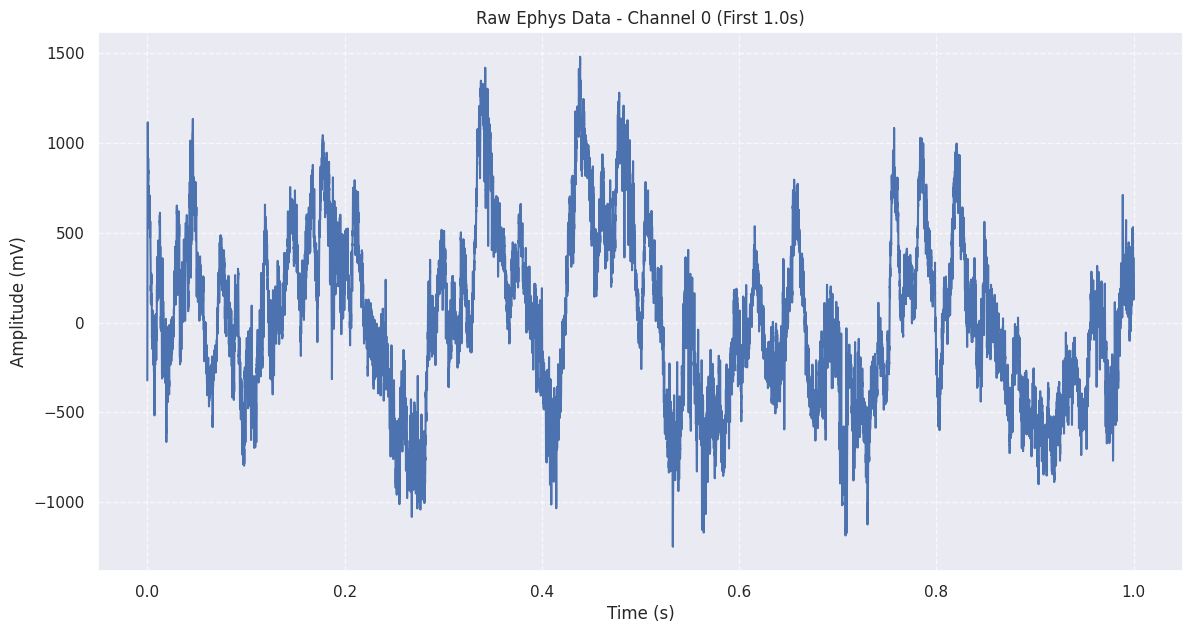

In [5]:
if nwbfile_obj and "time_series" in nwbfile_obj.acquisition:
    raw_ts = nwbfile_obj.acquisition["time_series"]
    print(f"Raw data shape (samples, channels): {raw_ts.data.shape}")
    print(f"Sampling rate: {raw_ts.rate} Hz")
    print(f"Data unit: {raw_ts.unit}")

    # Select a short duration and a single channel to plot
    duration_to_plot_s = 1.0  # seconds
    channel_to_plot_idx = 0   # first channel
    
    num_samples_to_plot = int(raw_ts.rate * duration_to_plot_s)

    if raw_ts.data.shape[0] >= num_samples_to_plot and raw_ts.data.shape[1] > channel_to_plot_idx:
        # Access data segment: data[start_sample:end_sample, channel_index]
        # Note: Accessing HDF5 data can be slow if not done efficiently.
        # For remote files, slicing small contiguous blocks is generally better.
        data_segment = raw_ts.data[:num_samples_to_plot, channel_to_plot_idx]
        
        # Create time vector for plotting
        time_vector = np.linspace(0, duration_to_plot_s, num_samples_to_plot, endpoint=False)
        
        plt.figure(figsize=(14, 7))
        plt.plot(time_vector, data_segment)
        plt.title(f"Raw Ephys Data - Channel {channel_to_plot_idx} (First {duration_to_plot_s}s)")
        plt.xlabel("Time (s)")
        plt.ylabel(f"Amplitude ({raw_ts.unit})")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"Not enough data or channel {channel_to_plot_idx} does not exist to plot the requested segment.")
        print(f"Data shape: {raw_ts.data.shape}, Requested samples: {num_samples_to_plot}, Requested channel index: {channel_to_plot_idx}")
else:
    print("Raw 'time_series' not found in nwbfile.acquisition or NWB file not loaded.")

This plot shows the voltage fluctuations over a 1-second window for the selected channel. This type of visualization helps to get a feel for the signal quality and presence of neural activity.

## 5. Exploring Trial Information

Experimental trials (e.g., different stimuli, behavioral epochs) are often stored in `nwbfile_obj.intervals`. Let's look at the `trials` table, if it exists.

Trials table description: trial start/stop times
Trials table columns: ('start_time', 'stop_time')

Number of trials: 387
Trials DataFrame columns: ['start_time', 'stop_time']
First 5 trials:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467


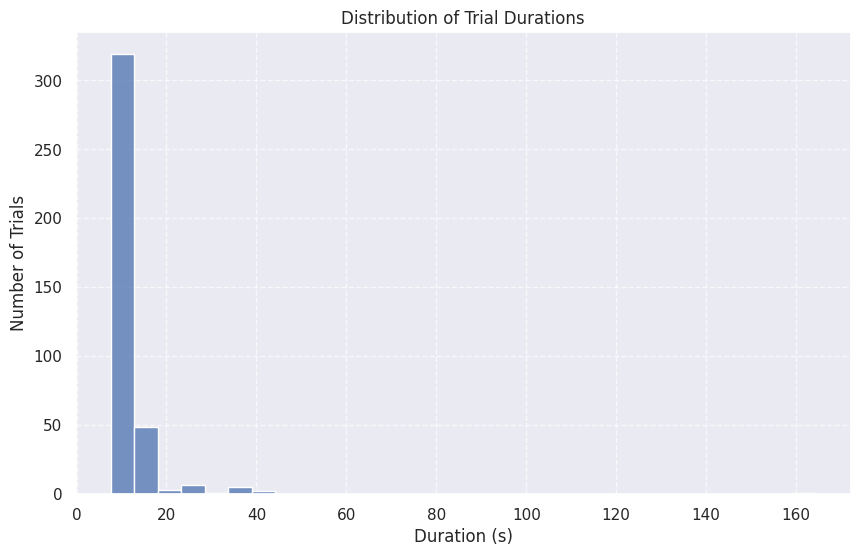


Summary statistics for trial durations:
count    387.000000
mean      12.300654
std        8.968260
min        7.656600
25%        9.964817
50%       10.857600
75%       12.095133
max      164.306967
Name: duration, dtype: float64


In [6]:
if nwbfile_obj and "trials" in nwbfile_obj.intervals:
    trials_table = nwbfile_obj.intervals["trials"]
    print(f"Trials table description: {trials_table.description}")
    print(f"Trials table columns: {trials_table.colnames}")

    # Convert to pandas DataFrame for easier manipulation and viewing
    trials_df = trials_table.to_dataframe()
    
    print(f"\nNumber of trials: {len(trials_df)}")
    print(f"Trials DataFrame columns: {list(trials_df.columns)}") # Added to show all columns
    print("First 5 trials:")
    print(trials_df.head())

    # Calculate trial durations
    if 'start_time' in trials_df.columns and 'stop_time' in trials_df.columns:
        trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']
        
        plt.figure(figsize=(10, 6))
        sns.histplot(trials_df['duration'], kde=False, bins=30) # kde=False for cleaner histogram
        plt.title("Distribution of Trial Durations")
        plt.xlabel("Duration (s)")
        plt.ylabel("Number of Trials")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
        
        print("\nSummary statistics for trial durations:")
        print(trials_df['duration'].describe())
    else:
        print("\n'start_time' or 'stop_time' columns not found in trials DataFrame.")
else:
    print("'trials' table not found in nwbfile.intervals or NWB file not loaded.")

The histogram shows the distribution of trial durations. In this dataset, most trials appear to be relatively short, with a few longer ones, indicated by the right skew.

## 6. Visualizing Neuronal Spike Data (Units)

Sorted spike times, representing the activity of individual (or multi-) units, are stored in `nwbfile_obj.units`. We can visualize this using a raster plot.

Units table description: units table
Units table columns: ('spike_times',)



Number of detected units: 33
Information for the first few units:
                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...


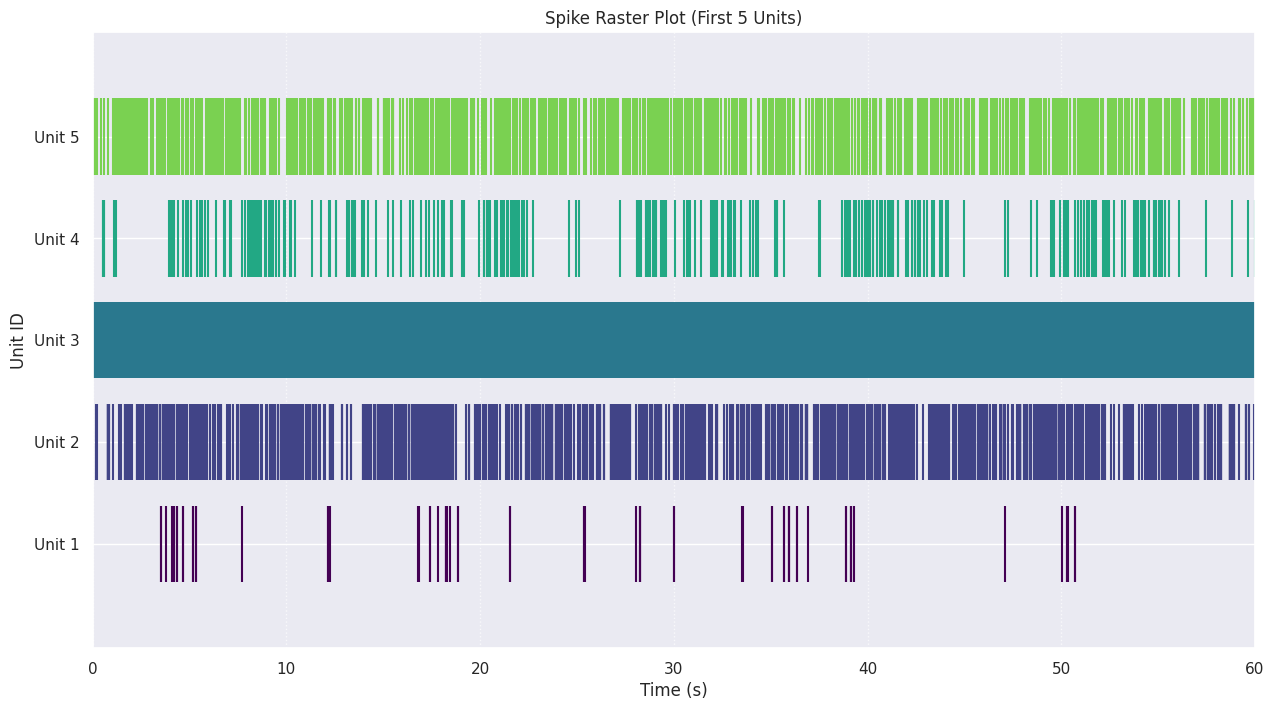


Note on Unit Activity:
- Some units may exhibit very high firing rates (e.g., Unit 3 noted during initial exploration, though IDs might differ if the unit table is sorted or filtered differently here).
- For such densely firing units, the raster plot might appear as a solid band. In these cases, alternative visualizations like a peri-stimulus time histogram (PSTH) or a binned firing rate plot could be more informative for that specific unit's activity pattern.
- Other units typically show more distinct, sparse spiking patterns, which are well-represented by raster plots.


In [7]:
if nwbfile_obj and nwbfile_obj.units is not None:
    units_table = nwbfile_obj.units
    print(f"Units table description: {units_table.description if hasattr(units_table, 'description') else 'N/A'}")
    print(f"Units table columns: {units_table.colnames}")

    # Convert to pandas DataFrame
    # The 'spike_times' column will contain arrays (or ragged arrays) of spike times for each unit.
    units_df = units_table.to_dataframe()
    print(f"\nNumber of detected units: {len(units_df)}")
    
    if not units_df.empty:
        print("Information for the first few units:")
        print(units_df.head())

        # Select a subset of units for plotting to keep the raster plot readable
        num_units_to_plot = min(5, len(units_df))
        # units_df is indexed by unit ID by default.
        selected_unit_indices = units_df.index[:num_units_to_plot] 

        spike_times_list = [units_df.loc[unit_id, 'spike_times'] for unit_id in selected_unit_indices]
        
        actual_unit_ids_plotted = selected_unit_indices.tolist()

        plt.figure(figsize=(15, max(8, num_units_to_plot * 1.5))) # Adjust height based on num units
        
        # Ensure distinct colors if possible, using a colormap. Correct usage for Matplotlib 3.7+
        try:
            cmap = plt.colormaps['viridis']
        except AttributeError: # Fallback for older Matplotlib
             cmap = plt.cm.get_cmap('viridis') # type: ignore
        
        colors = [cmap(i/num_units_to_plot) for i in range(num_units_to_plot)]

        plt.eventplot(spike_times_list, linelengths=0.75, colors=colors)
        
        plt.yticks(np.arange(num_units_to_plot), [f"Unit {uid}" for uid in actual_unit_ids_plotted])
        plt.xlabel("Time (s)")
        plt.ylabel("Unit ID")
        plt.title(f"Spike Raster Plot (First {num_units_to_plot} Units)")

        # Determine a reasonable x-axis limit for the plot
        # For instance, limit to the first 60 seconds or end of the 5th trial
        max_time_plot_s = 60.0
        if nwbfile_obj.trials is not None and len(nwbfile_obj.trials.stop_time) > 4 :
            time_limit_from_trials = nwbfile_obj.trials.stop_time[4] # end of 5th trial
            # If all spike times are shorter than this trial end, use max spike time.
            max_spike_time_overall = 0
            if spike_times_list:
                all_spikes_flat = np.concatenate([st for st in spike_times_list if st is not None and len(st)>0])
                if len(all_spikes_flat) > 0:
                    max_spike_time_overall = np.max(all_spikes_flat)

            effective_time_limit = min(max_time_plot_s, time_limit_from_trials)
            if max_spike_time_overall > 0 and max_spike_time_overall < effective_time_limit:
                 effective_time_limit = max_spike_time_overall if max_spike_time_overall > 1 else effective_time_limit # ensure reasonable limit
            plt.xlim(0, effective_time_limit)
        else:
            plt.xlim(0, max_time_plot_s) # Default if not enough trial info
            
        plt.grid(True, axis='x', linestyle=':', alpha=0.7)
        plt.show()
        
        print("\nNote on Unit Activity:")
        print("- Some units may exhibit very high firing rates (e.g., Unit 3 noted during initial exploration, though IDs might differ if the unit table is sorted or filtered differently here).")
        print("- For such densely firing units, the raster plot might appear as a solid band. In these cases, alternative visualizations like a peri-stimulus time histogram (PSTH) or a binned firing rate plot could be more informative for that specific unit's activity pattern.")
        print("- Other units typically show more distinct, sparse spiking patterns, which are well-represented by raster plots.")

    else:
        print("\nUnits table is empty. No spike data to plot.")
else:
    print("'units' table not found in NWB file or NWB file not loaded.")

This raster plot displays the spike times for the first few units. Each row corresponds to a unit, and each vertical tick represents a spike. This visualization helps in observing firing patterns, such as bursting or sustained activity, and comparing activity across different units. As noted, some units (like Unit 3 seen in exploration) might exhibit very high firing rates.

## 7. Summary and Future Directions

This notebook demonstrated how to:
*   Connect to the DANDI Archive and retrieve Dandiset metadata and asset information.
*   Load a specific NWB file from Dandiset 001375 using its remote URL.
*   Get a basic overview of the NWB file structure.
*   Visualize key data types:
    *   Raw electrophysiology traces.
    *   Trial duration distributions.
    *   Spike raster plots for neuronal units.

### Possible Future Directions:

*   **Detailed Electrode Analysis:** Explore the `electrodes` table to understand the spatial layout and properties of recording channels. Correlate electrode locations (e.g., brain regions like hippocampus, visual cortex mentioned in `electrode_groups`) with neural activity.
*   **Event-Related Analysis:** Align neural activity (e.g., firing rates) to specific trial events (start/stop times or other behavioral markers if available within the trials table or other interval data).
*   **Cross-Unit Correlations:** Investigate functional connectivity by calculating cross-correlations between the spike trains of different units.
*   **Frequency-Domain Analysis:** For the raw ephys data, perform spectral analysis (e.g., power spectral density) to identify dominant oscillations (e.g., theta, gamma rhythms).
*   **Comparison Across Conditions/Subjects:** If the Dandiset contains data from multiple experimental conditions, sessions, or subjects, extend these analyses to compare neural activity. The Dandiset has multiple NWB files; similar analyses could be run on them.
*   **Advanced Visualizations:** Create more sophisticated plots, such as peri-stimulus time histograms (PSTHs) a/c/a trial-averaged firing rates, or heatmaps of neural activity across many channels or units.

This notebook serves as a starting point. The rich data within this Dandiset offers many avenues for deeper neuroscientific investigation. Remember to consult the Dandiset's documentation and related publications for more context on the experimental design and specific hypotheses.

In [8]:
# It's good practice to close the NWB file if you are done with it,
# especially if you were to open multiple files in a loop.
# However, for a linear notebook like this, it will be implicitly closed when the kernel stops
# or when 'io_obj' and 'h5_f' go out of scope if not needed later.
if io_obj:
    try:
        print("\nClosing NWB file resources...")
        io_obj.close()
        # The h5py.File (h5_f) is often closed by io_obj.close() if it was opened by NWBHDF5IO.
        # If h5_f was passed to NWBHDF5IO, NWBHDF5IO does not close it.
        # remfile.File (remote_f) typically doesn't need explicit closing for read-only.
        if 'h5_f' in locals() and h5_f.__bool__(): # Check if h5_f exists and is open
             if h5_f.id.valid: # Check if file is still open
                h5_f.close()
        if 'remote_f' in locals() and hasattr(remote_f, 'close'):
             remote_f.close() # Close if it has a close method and is still open
        print("NWB file resources closed.")
    except Exception as e:
        print(f"Error during explicit close: {e}")


Closing NWB file resources...
NWB file resources closed.


End of notebook.